# Exploratory Data Analysis


# Importing Libraries

In [ ]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join("../scripts")))
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plots #plot scrpt
import warnings
import pandas as pd 
warnings.filterwarnings('ignore')

In [20]:
'''import pandas as pd
def audio_test(data:pd.DataFrame,col:str,row:int):
  file=data[col].loc[row]
  plt.figure(figsize=(12,6))
  signal,sample_rate=librosa.load(file)
  librosa.display.waveplot(signal,sr=sample_rate)
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.show()
  return ipd.Audio(file)'''

"import pandas as pd\ndef audio_test(data:pd.DataFrame,col:str,row:int):\n  file=data[col].loc[row]\n  plt.figure(figsize=(12,6))\n  signal,sample_rate=librosa.load(file)\n  librosa.display.waveplot(signal,sr=sample_rate)\n  plt.xlabel('Time')\n  plt.ylabel('Amplitude')\n  plt.show()\n  return ipd.Audio(file)"

# Reading the data

In [22]:
mata_data_path = "../metadata.csv"

# Plotting

In [23]:
import pandas as pd
meta_data = pd.read_csv(mata_data_path)

In [24]:
meta_data.head()

,filename,transcription,duration
0,JE-cbfx8I_4__U__S20---0129.000-0135.290.wav,127 kwa vizazi hai 1000 2016,8.289875
1,clipping-Ec6D-nKH_Oo__U__S298---1777.270-1782....,bwana yesu asifiwe bwana yesu asifiwe,7.539875
2,augmentation_lobe-BcnWC4XTzLk__U__S16---2192.9...,kwa upande wa jitihada za kusomesha wanafunzi ...,15.249875
3,clipping-Bg94dVxlGRc__U__S132---0861.280-0865....,nisamehe,6.389875
4,speed_perturbation-3usInTfUCOE__U__S117---0388...,mungu hapendi tuzoee mungu apendi kukariri,6.909875


In [25]:
meta_data.describe


<bound method NDFrame.describe of                                                filename  \
0           JE-cbfx8I_4__U__S20---0129.000-0135.290.wav   
1     clipping-Ec6D-nKH_Oo__U__S298---1777.270-1782....   
2     augmentation_lobe-BcnWC4XTzLk__U__S16---2192.9...   
3     clipping-Bg94dVxlGRc__U__S132---0861.280-0865....   
4     speed_perturbation-3usInTfUCOE__U__S117---0388...   
...                                                 ...   
1359  augmentation_lobe-URMPLgiezPA__U__S20---0198.8...   
1360  augmentation_lobe-4d2h354OLps__U__S154---1234....   
1361       cFLAY0PyjYM__U__S101---0349.400-0354.030.wav   
1362  speed_perturbation-vk7Acdp3DAQ__U__S160---1590...   
1363  time_dropout-KTafCSIvLBo__U__S1---1531.190-154...   

                                          transcription   duration  
0                          127 kwa vizazi hai 1000 2016   8.289875  
1                 bwana yesu asifiwe bwana yesu asifiwe   7.539875  
2     kwa upande wa jitihada za kusomesha wanafunz

In [26]:
meta_data.columns

Index(['filename', 'transcription', 'duration'], dtype='object')

In [27]:
meta_data['duration'].value_counts()

duration
5.519875     10
5.909875     10
5.539875      9
6.269875      9
7.969875      8
             ..
11.699875     1
9.499875      1
8.139875      1
5.859875      1
7.729875      1
Name: count, Length: 569, dtype: int64

In [29]:
duration_df = meta_data[['duration','filename']]

In [30]:
duration_df.describe()

,duration
count,1364.000000
mean,9.356715
std,4.139202
min,3.739875
25%,6.309875
50%,7.969875
75%,11.029875
max,21.859875


Observe the min and max duration per file

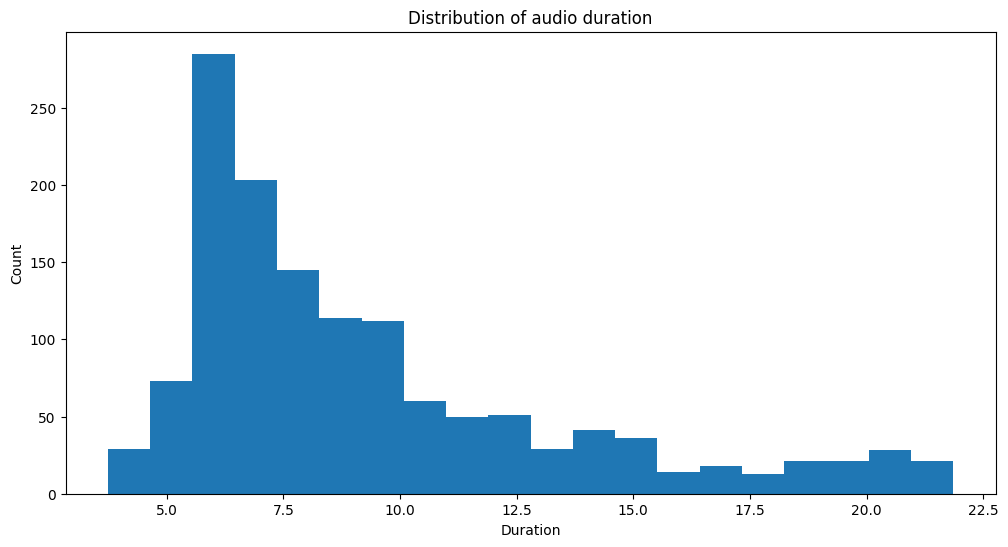

In [37]:
# import plots
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title('Distribution of audio duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.hist(duration_df['duration'],bins=20)
plt.show()
# plots.plot_hist(duration_df,'duration','orane')

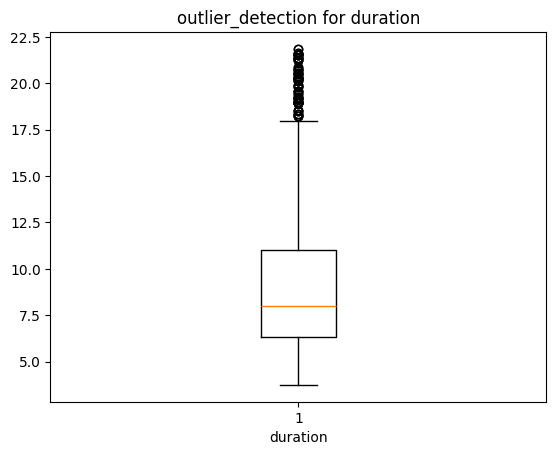

In [43]:
plt.boxplot(duration_df['duration'])
plt.title('outlier_detection for duration')
plt.xlabel("duration")
plt.show()

Filling outliers in audio file duration typically involves either trimming or interpolating the audio data to achieve a more consistent duration. Outliers in audio duration could be caused by various factors such as recording errors, glitches, or other issues. 
steps:
- Identify Outliers

- Trimming If the outliers are due to extra silence at the beginning or end of the audio file, you can trim the excess. You can use audio editing software or programming libraries to trim the audio file to the desired duration. ie python librosa lib

- Interpolation: If the outliers are due to missing or erroneous data within the audio file, you may need to interpolate the audio to fill in the gaps. This approach involves estimating the values of missing samples based on the surrounding data.

- Validate: After trimming or interpolating, validate the resulting audio files to ensure they meet your expectations in terms of quality and duration.


In [45]:
!pip install librosa

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 KB 321.2 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 132.7 kB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.8/530.8 KB 41.8 kB/s eta 0:00:0031m39.7 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 180.7 kB/s eta 0:00:000:00:0136m-:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 228.6 kB/s eta 0:00:00m eta 0:00:010:01:01


In [52]:
!pip list

Package                      Version
---------------------------- ----------------
absl-py                      2.0.0
altair                       5.2.0
anyio                        4.1.0
apturl                       0.5.2
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asgiref                      3.7.2
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
audioread                    3.0.1
awesome-streamlit            20200728.1
Babel                        2.13.1
bcrypt                       3.2.0
beautifulsoup4               4.12.2
bidict                       0.22.1
bleach                       6.1.0
blinker                      1.7.0
Brlapi                       0.8.3
cachetools                   5.3.2
certifi                      2020.6.20
cffi                         1.16.0
chardet                      4.0.0
charset-normalizer        

In [58]:
import librosa

# Load audio file
audio_path = "/home/rogendo/Desktop/Speech-Recognition/data/swahili/wavs/kN-05i7rz1U__U__S37---0297.620-0301.030.wav"
y, sr = librosa.load(audio_path)

# Interpolate the audio to a specific duration
desired_duration = 60.0  # Replace with your desired duration in seconds
y_interpolated = librosa.effects.preemphasis(y, coef=0.97)  # Replace with appropriate interpolation method


# Save the interpolated audio

# librosa.output.write_wav("/home/rogendo/Desktop/Speech-Recognition/Interpolated-audio/kN-05i7rz1U__U__S37---0297.620-0301.030.wav", y_interpolated, sr)


[0. 0. 0. ... 0. 0. 0.]


In [59]:
long_audios = duration_df.sort_values(by="duration", ascending=False).head()
print("long_audios")
display(long_audios)

short_audios = duration_df.sort_values(by="duration", ascending=True).head()
print("short audios")
display(short_audios)

long_audios


,duration,filename
894,21.859875,augmentation_lobe-orlrwt99peg__U__S12---0076.0...
597,21.859875,orlrwt99peg__U__S12---0076.070-0095.930.wav
786,21.659875,augmentation_lobe-QjBGqxjSBiU__U__S141---0904....
1005,21.619875,speed_perturbation-kmHICs24NO8__U__S11---0101....
647,21.609875,frequency_dropout-NukNvWI5_jE__U__S207---1486....


short audios


,duration,filename
362,3.739875,clipping-a-VpqLnZvnM__U__S0---1592.400-1594.14...
864,3.949875,clipping-pLO-uFdN8a8__U__S9---0108.630-0110.58...
217,3.999875,frequency_dropout-BNELXm8wnJI__U__S134---0875....
146,3.999875,BNELXm8wnJI__U__S134---0875.840-0877.840.wav
1029,4.049875,frequency_dropout-Xk1amaqDH0c__U__S6---0157.44...


In [60]:
def remove_space(snt: str) -> str:
    sent_list =snt.split(' ')
    return ''.join(sent_list)
#the function remove the space from the transcription

In [61]:
meta_data['tran_len'] = meta_data['transcription'].apply(lambda x: len(remove_space(x)))

the below plot shows us the longest Translation In a dataset

,tran_len
count,1364.000000
mean,51.274927
std,44.070276
min,1.000000
25%,20.000000
50%,40.000000
75%,66.250000
max,233.000000


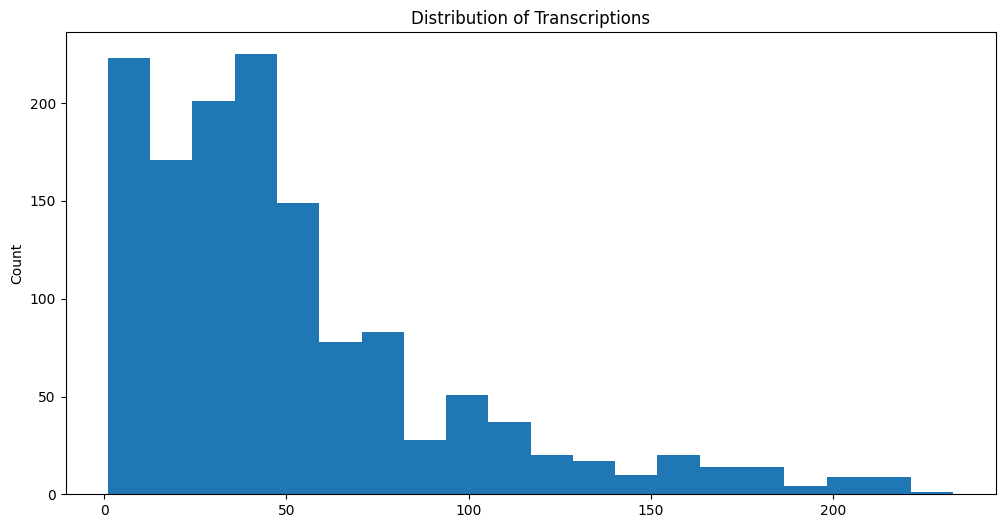

long transaltions


,tran_len,filename
560,233,augmentation_lobe-h1VgPAKN9fQ__U__S16---0011.9...
907,218,frequency_dropout-4JlULZwlK7g__U__S1---0273.17...
880,218,clipping-ASvWU1Skpt4__U__S35---0499.100-0518.6...
848,218,augmentation_lobe-ASvWU1Skpt4__U__S35---0499.1...
392,216,augmentation_lobe-wOX4IIMwsJU__U__S0---0000.00...


short transaltions


,tran_len,filename
638,1,frequency_dropout-2KOk28_WF-0__U__S102---0593....
960,1,speed_perturbation-Ou0b8OJxYAw__U__S44---0276....
891,1,clipping-2KOk28_WF-0__U__S102---0593.190-0598....
68,1,speed_perturbation-JlbtOdWxZqU__U__S110---0782...
72,1,clipping-jLil0nqayy8__U__S104---1109.900-1122....


In [70]:
trans_df = meta_data[['tran_len', 'filename']]
display(trans_df.describe())
# plots.plot_hist(trans_df, 'tran_len', 'green')
plt.figure(figsize=(12,6))
plt.title('Distribution of Transcriptions')
plt.ylabel('Count')
plt.hist(trans_df['tran_len'],bins=20)
plt.show()
long_chars = trans_df.sort_values(by="tran_len", ascending=False).head()
print("long transaltions")
display(long_chars)

short_chars = trans_df.sort_values(by="tran_len", ascending=True).head()
print("short transaltions")
display(short_chars)

In [73]:
meta_data['char_per_sec'] = meta_data['tran_len']/meta_data['duration']
# Create a column called char_per_sec in our table

In [74]:
meta_data

,filename,transcription,duration,tran_len,char_per_sec
0,JE-cbfx8I_4__U__S20---0129.000-0135.290.wav,127 kwa vizazi hai 1000 2016,8.289875,23,2.774469
1,clipping-Ec6D-nKH_Oo__U__S298---1777.270-1782....,bwana yesu asifiwe bwana yesu asifiwe,7.539875,32,4.244102
2,augmentation_lobe-BcnWC4XTzLk__U__S16---2192.9...,kwa upande wa jitihada za kusomesha wanafunzi ...,15.249875,137,8.983680
3,clipping-Bg94dVxlGRc__U__S132---0861.280-0865....,nisamehe,6.389875,8,1.251981
4,speed_perturbation-3usInTfUCOE__U__S117---0388...,mungu hapendi tuzoee mungu apendi kukariri,6.909875,37,5.354655
...,...,...,...,...,...
1359,augmentation_lobe-URMPLgiezPA__U__S20---0198.8...,kesho ya shirika la tanapa,5.769875,22,3.812908
1360,augmentation_lobe-4d2h354OLps__U__S154---1234....,katika kila kitu ambacho bwana yesu alifanya b...,7.729875,58,7.503355
1361,cFLAY0PyjYM__U__S101---0349.400-0354.030.wav,nifahamu ya uzalendo ambao nimeanza kuona,6.629875,36,5.429967
1362,speed_perturbation-vk7Acdp3DAQ__U__S160---1590...,ili tuanze kuongea kama wakenya,5.519875,27,4.891415


,char_per_sec
count,1364.000000
mean,5.299010
std,2.894094
min,0.051547
25%,2.832761
50%,5.816401
75%,7.477506
max,12.535929


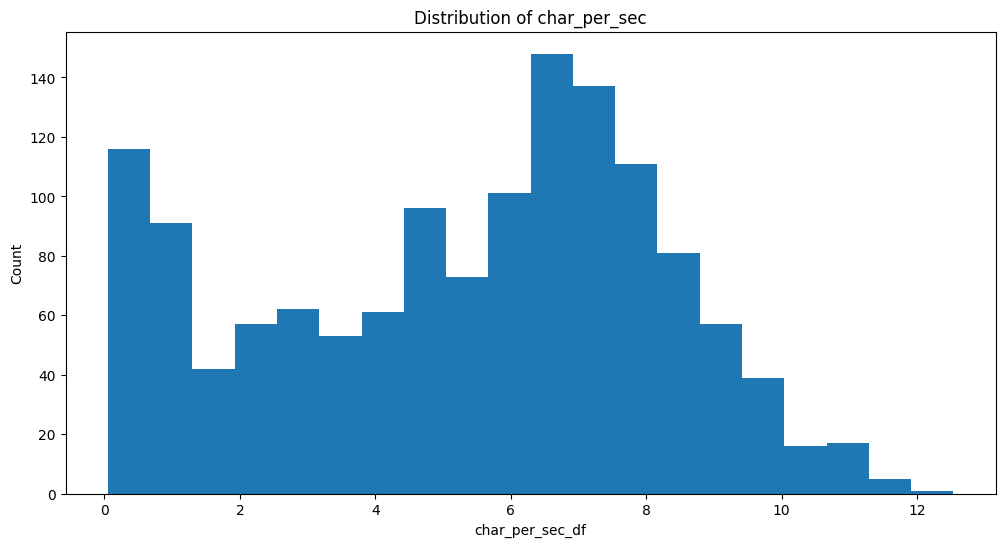

In [78]:
char_per_sec_df = meta_data[['char_per_sec', 'filename']]
display(char_per_sec_df.describe())
plt.figure(figsize=(12,6))
plt.title("Distribution of char_per_sec")
plt.xlabel("char_per_sec_df")
plt.ylabel("Count")
plt.hist(char_per_sec_df["char_per_sec"],bins=20)
plt.show()